# Titanic Analysis and Predictions

In [257]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [277]:
train_data = pd.read_csv('/Users/andrew/OneDrive - Williams College/Data Science Projects/Kaggle/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
test_data = pd.read_csv('/Users/andrew/OneDrive - Williams College/Data Science Projects/Kaggle/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Recode Data

In [279]:
# Recode sex into dummy
train_data['Sex'] = [1 if sex == 'male' else 0 for sex in train_data['Sex']]
test_data['Sex'] = [1 if sex == 'male' else 0 for sex in test_data['Sex']]

## Deal with Missing Data

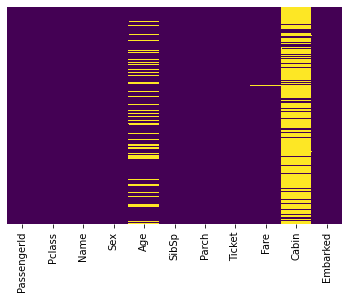

In [280]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

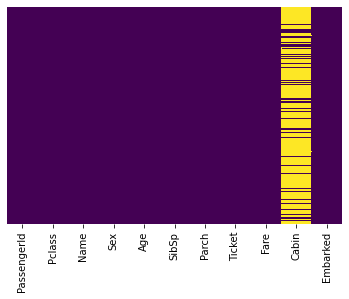

In [281]:
# Drop cabin column as there are too many missing points
# Drop textual and other irrelevant data
train_data = train_data.drop(columns = ['Cabin','Embarked','Name','Ticket','PassengerId'])

# Impute missing cells for age with mean age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Fare'] = [fare if pd.notna(fare) else test_data['Fare'].mean() for fare in test_data['Fare']]

# Check if any missing data still
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [282]:
# Show cleaned data
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Explore Data

In [283]:
# Set color palette
p = 'coolwarm'
sns.set_palette(p)

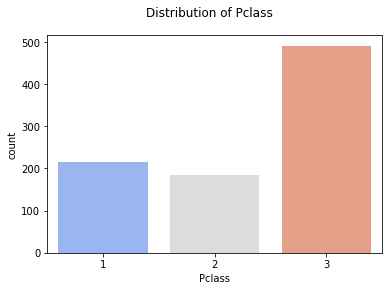

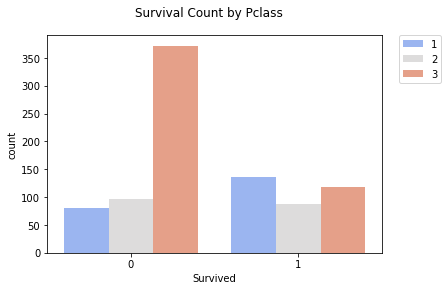

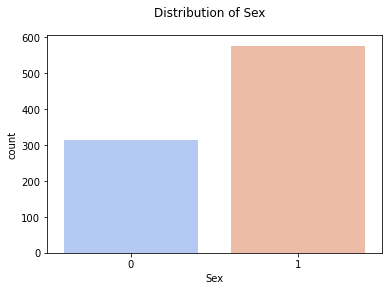

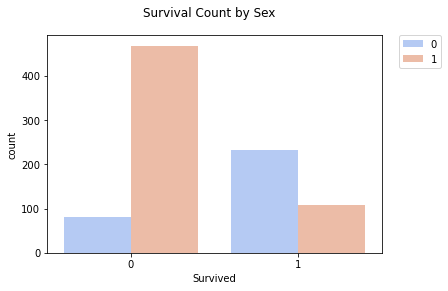

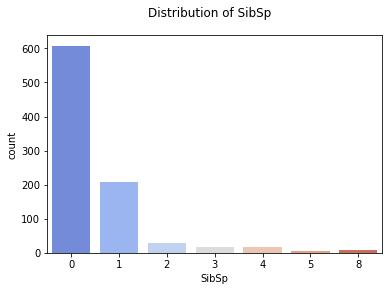

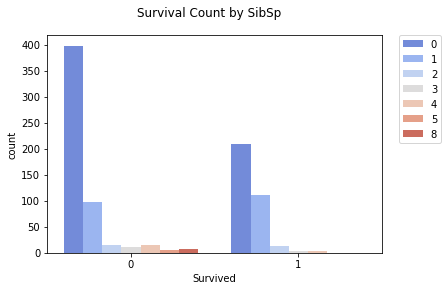

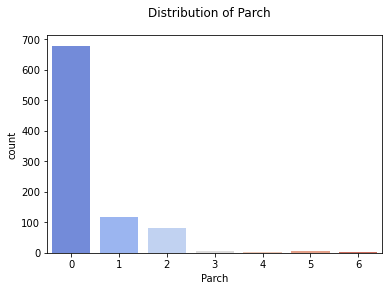

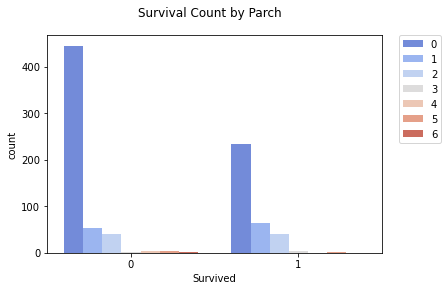

In [284]:
# Check distributions and survival distributions for discrete variables
discrete_vars = ['Pclass','Sex','SibSp','Parch']

for var in discrete_vars:
    plt.figure()
    plt.suptitle('Distribution of ' + var)
    sns.countplot(x=var, data=train_data, palette=p)
    
    plt.figure()
    plt.suptitle('Survival Count by ' + var)
    sns.countplot(x='Survived', hue=var, data=train_data, palette=p)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Insights:
1. The majority of passengers were in Pclass 3. This makes sense given Pclass 3 is cheapest.
2. By far, most people who died were in Pclass 3. But the survivors were evenly split between classes.
3. There were almost twice as many men as there were women.
4. Most people who died were men. Most survivors were women.
5. Most passengers were alone. About a fourth were with a sibling or spouse.
6. Solo passengers were the majority of survivors and non-survivors.

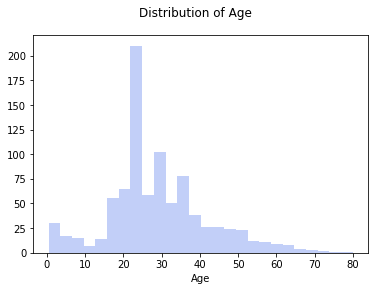

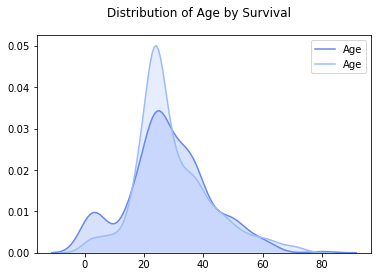

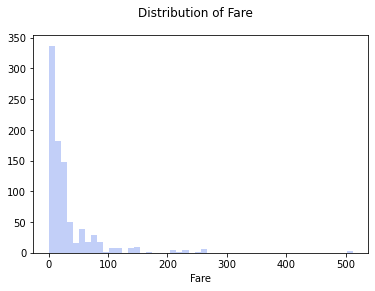

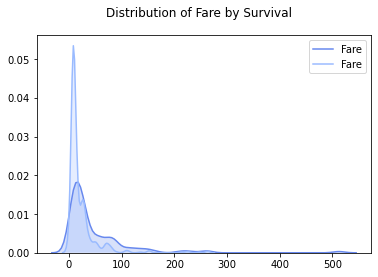

In [285]:
# Check distributions and survival distributions of continuous variables
continuous_vars = ['Age','Fare']

for var in continuous_vars:
    plt.figure()
    plt.suptitle('Distribution of ' + var) 
    sns.distplot(train_data[var], kde=False)
    
    plt.figure()
    plt.suptitle('Distribution of ' + var + ' by Survival')
    sns.kdeplot(train_data[train_data['Survived'] == 1][var], shade=True)
    sns.kdeplot(train_data[train_data['Survived'] == 0][var], shade=True)


Insights:
1. Most people were 20-50 years old.
2. Generally, age does not predict survival.
3. Most tickets were cheaper than 100 dollars.
4. Most non-survivors had cheaper tickets.

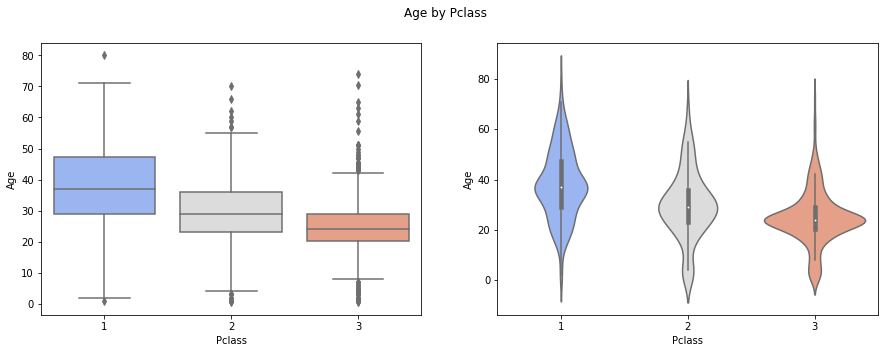

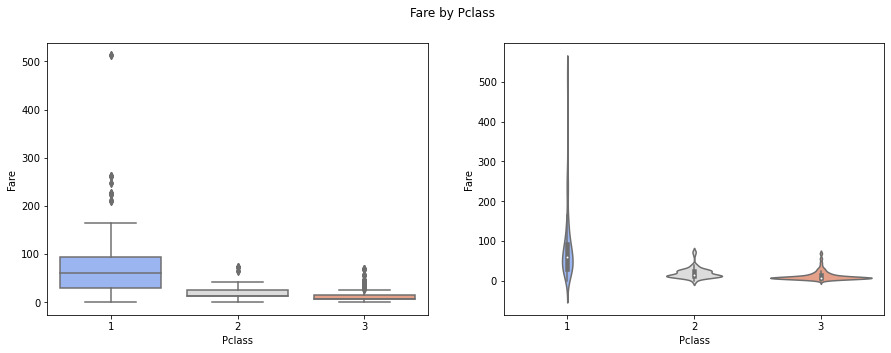

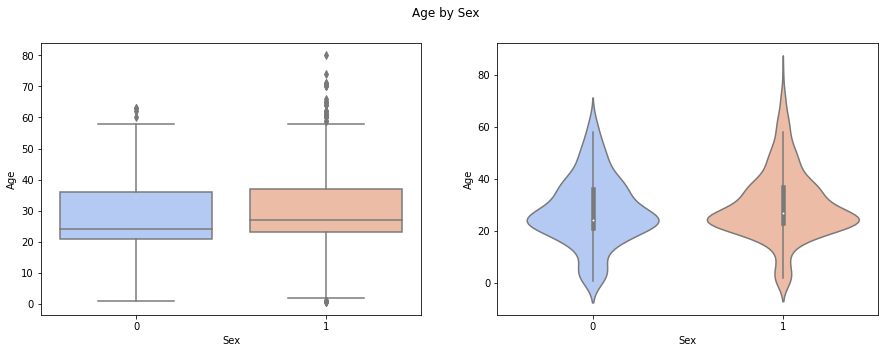

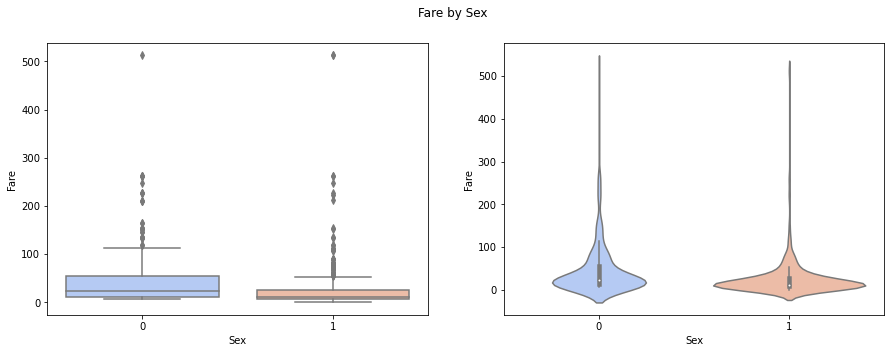

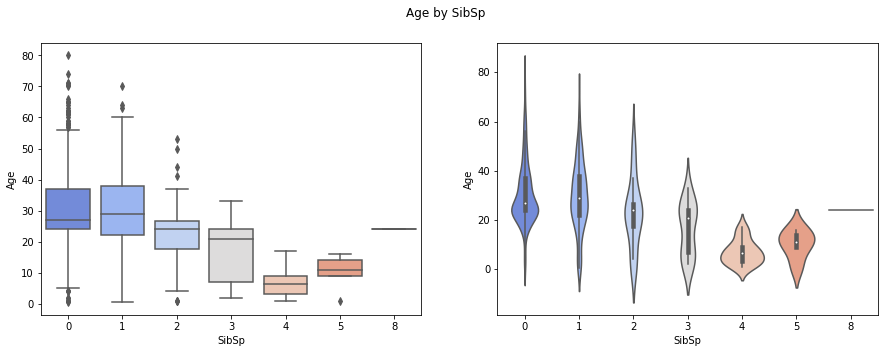

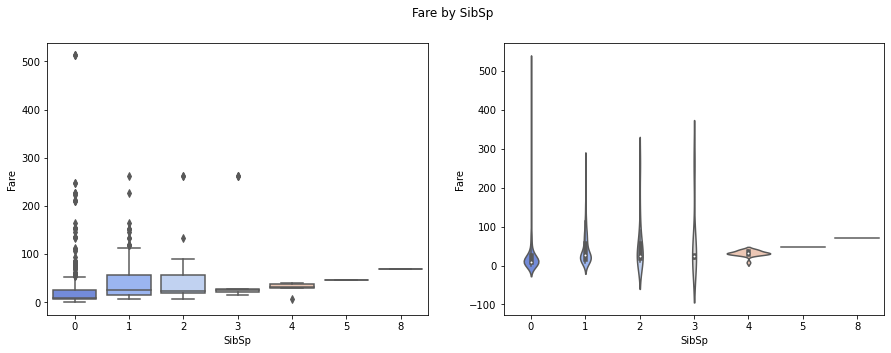

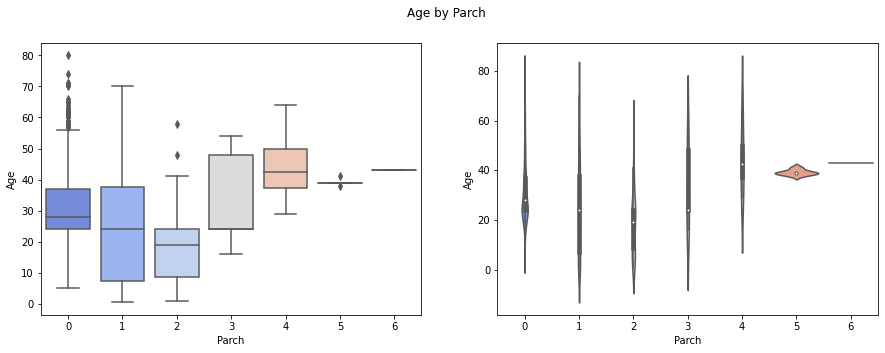

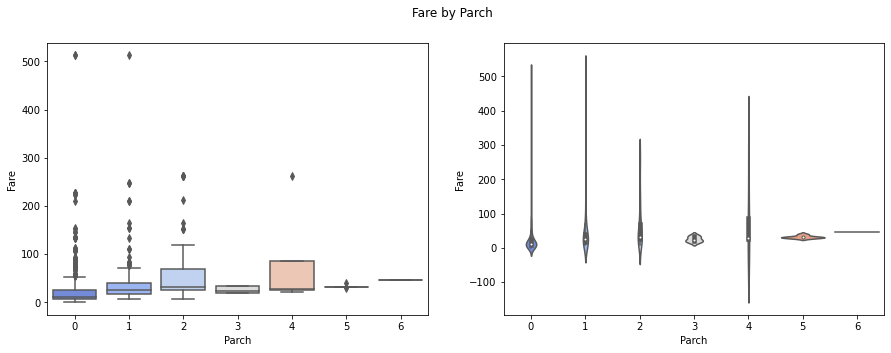

In [286]:
# Plot continuous variables against discrete variables
for var in discrete_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    plt.suptitle('Age by ' + var)
    sns.boxplot(x=var, y='Age', data=train_data, palette=p, ax=axes[0])
    sns.violinplot(x=var, y='Age', data=train_data, palette=p, ax=axes[1])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    plt.suptitle('Fare by ' + var)
    sns.boxplot(x=var, y='Fare', data=train_data, palette=p, ax=axes[0])
    sns.violinplot(x=var, y='Fare', data=train_data, palette=p, ax=axes[1])



Insights:
1. Higher Pclass --> older (Distributions probably not significantly different by ANOVA)
2. Higher Pclass --> higher fare
3. Males age ~= female age
4. Male fares ~= female fares
5. More siblings/spouses --> younger
6. More parents/children --> older
7. Fares have a very wide distributions with many outliers. To get deeper insights, run ANOVAs and post-hoc t-tests.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,0.114569,0.295231,0.002233,0.001248,0.006663,0.066207
Pclass,0.114569,1.000000,0.017398,0.166862,0.006903,0.000340,0.301950
Sex,0.295231,0.017398,1.000000,0.006150,0.013140,0.060265,0.033245
Age,0.002233,0.166862,0.006150,1.000000,0.059305,0.029273,0.015322
SibSp,0.001248,0.006903,0.013140,0.059305,1.000000,0.172090,0.025488
Parch,0.006663,0.000340,0.060265,0.029273,0.172090,1.000000,0.046753
Fare,0.066207,0.301950,0.033245,0.015322,0.025488,0.046753,1.000000


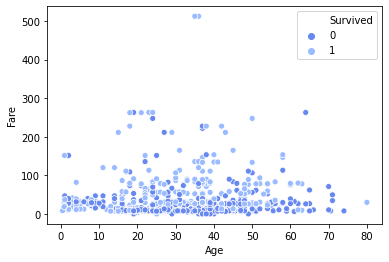

In [287]:
# Plot correlations
sns.scatterplot(x='Age', y='Fare', data=train_data, hue='Survived')
r = train_data.corr() # Pearson correlation values
r_squared = train_data.corr()**2
r_squared

Insights:
1. Fare explains 30% of variance in pclass
2. Age explains 17% of variance in pclass
3. Sex explains 30% of variance in survival
4. SibSp explains 17% of variance in Parch
5. Sex is the best single predictor for survival
6. Can probably combine variables through PCA to get higher predictability for survival

## Get better predicting variables through PCA

     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    1  34.5      0      0    7.8292
1         3    0  47.0      1      0    7.0000
2         2    1  62.0      0      0    9.6875
3         3    1  27.0      0      0    8.6625
4         3    0  22.0      1      1   12.2875
..      ...  ...   ...    ...    ...       ...
413       3    1  24.0      0      0    8.0500
414       1    0  39.0      0      0  108.9000
415       3    1  38.5      0      0    7.2500
416       3    1  24.0      0      0    8.0500
417       3    1  24.0      1      1   22.3583

[418 rows x 6 columns]


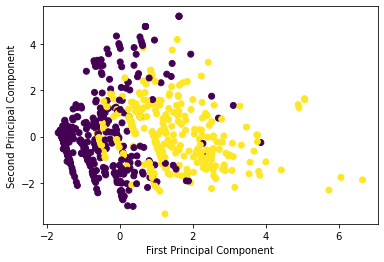

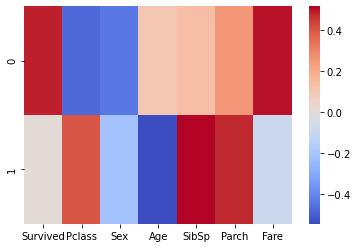

,pc1,pc2
0,-1.469088,0.500271
1,2.355383,-0.770605
2,0.361184,0.321698
3,2.147653,-0.615991
4,-1.481519,-0.502579
...,...,...
886,-0.931019,-0.659560
887,1.658191,-0.383710
888,0.270483,2.016399
889,0.795319,-1.113626


In [289]:
pca_train = train_data
pca_test = test_data.drop(columns=['Cabin','Embarked','Name','Ticket','PassengerId'])
print(pca_test)

# First, scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_test = StandardScaler()
scaler.fit(pca_train)
scaler_test.fit(pca_test)
scaled_data = scaler.transform(pca_train)
scaled_data_test = scaler_test.transform(pca_test)

# Then, perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_test = PCA(n_components = 2) 
pca.fit(scaled_data)
pca_test.fit(scaled_data_test)
x_pca = pca.transform(scaled_data)
x_pca_test = pca_test.transform(scaled_data_test)

# Plot transformed data
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1], c=pca_train['Survived'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# See what the components consist of
df_comp = pd.DataFrame(pca.components_, columns=pca_data.columns)
sns.heatmap(df_comp, cmap='coolwarm')
plt.show()

# Make new dataframes of PC's and predictor column
x_pca = pd.DataFrame(x_pca, columns=['pc1','pc2'])
x_pca_test = pd.DataFrame(x_pca_test, columns=['pc1','pc2'])
x_pca

## Model Data with Logistic Regression

In [294]:
# Logistic regression
X_train = x_pca
y_train = train_data['Survived']
X_test = x_pca_test

# Train model
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

# Predict from model
predictions = lm.predict(X_test)

# Put in CSV
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
